In [46]:
#fazendo todos os imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [8]:
#guardando o CSV em uma variável

data_base = pd.read_csv('aluguel_duas_variaveis_com_ruido.csv')

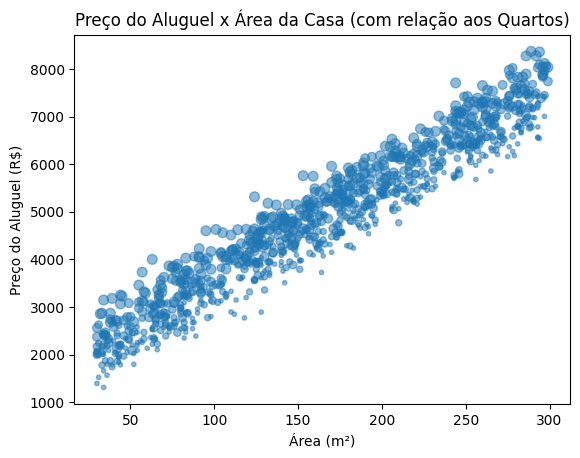

In [10]:
#Plotando gráfico com novo dado

plt.scatter(data_base['Area'], data_base['Preco'], s=data_base['Quartos']*10, alpha=0.5)
plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.title('Preço do Aluguel x Área da Casa (com relação aos Quartos)')
plt.show()


In [13]:
#Só vendo dados

data_base.head()

,Area,Quartos,Preco
0,132,2,3786.649334
1,136,5,4694.382578
2,101,3,3472.955795
3,218,1,5452.604056
4,50,3,2590.143495


In [16]:
#definindo as duas váriáveis principais para minha análise

X = data_base['Area']
y = data_base['Preco']
z = data_base['Quartos']

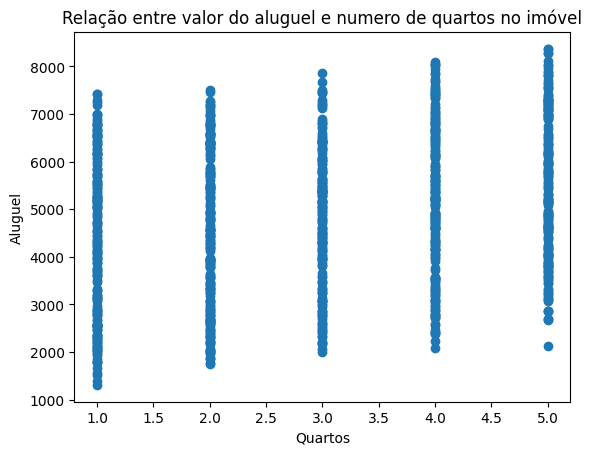

In [18]:
#plotando com nova variável

plt.scatter(z, y)
plt.title('Relação entre valor do aluguel e numero de quartos no imóvel')
plt.xlabel('Quartos')
plt.ylabel('Aluguel')
plt.show()

In [23]:
#preparando variáveis para nova análise

X = data_base[['Area', 'Quartos']]
y = data_base['Preco']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
#Treinando modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#Prevendo dados com o modelo

y_pred = model.predict(X_test)

In [29]:
#Verificando MSE

mse = mean_squared_error(y_test, y_pred)
print('Erro Quadrático Médio (MSE):', mse)

Erro Quadrático Médio (MSE): 56244.595712488044


In [44]:
#Avaliando performance do modelo

r2 = r2_score(y_test, y_pred)
print('Coeficiente de Determinação (R²):', r2)

Coeficiente de Determinação (R²): 0.9789142887225739


In [63]:
# Definindo os valores mínimos e máximos para 'Area' e 'Quartos' para plotagem

area_min = data_base['Area'].min()
area_max = data_base['Area'].max()
quartos_min = data_base['Quartos'].min()
quartos_max = data_base['Quartos'].max()


In [64]:
# Gerando valores de área e quartos para previsão

area_values = np.linspace(area_min, area_max, 100)
quartos_values = np.linspace(quartos_min, quartos_max, 100)

In [65]:
# Criando uma grid de pontos

area_grid, quartos_grid = np.meshgrid(area_values, quartos_values)

In [66]:
# Preparando os dados para fazer as previsões

X_mesh = np.column_stack([area_grid.ravel(), quartos_grid.ravel()])

In [68]:
# Fazendo as previsões usando o modelo treinado

y_mesh = model.predict(X_mesh)

# Redimensionando os valores para a forma da grid

y_mesh = y_mesh.reshape(area_grid.shape)

C:\Users\FSDem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


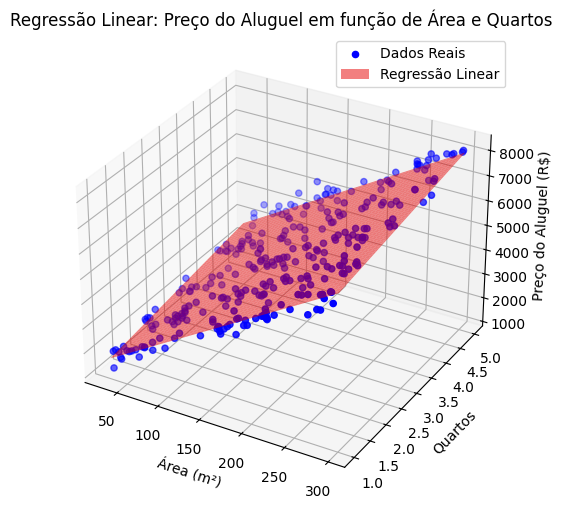

In [76]:
# Plotando o gráfico 3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Area'], X_test['Quartos'], y_test, color='blue', label='Dados Reais')

ax.plot_surface(area_grid, quartos_grid, y_mesh, color='red', alpha=0.5, label='Regressão Linear')
ax.set_xlabel('Área (m²)')
ax.set_ylabel('Quartos')
ax.set_zlabel('Preço do Aluguel (R$)')
ax.set_title('Regressão Linear: Preço do Aluguel em função de Área e Quartos')
ax.legend()
plt.show()